<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_miniprojects/blob/main/IV_pets_bboxes%2C_mmdet%2C_faster_rcnn_2021_8_20_12nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# try https://github.com/aaodiall/icevision_example/blob/main/Test_Fix_Color_Icevision.ipynb
# https://github.com/kunal-26/icevision/blob/master/train.ipynb
# https://github.com/silug109/icevision_misismipt_code/blob/master/evaluate.py
# predict https://github.com/VipulGajbhiye/Object-Detection-with-Yolov5/blob/main/Yolo_widgets.ipynb


In [44]:
## gpu, high ram
#icevision.__version__
print(torch.__version__)
print(torchvision.__version__)


1.8.0+cu101
0.9.0+cu101


In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-08-20 14:58:11--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-08-20 14:58:11 (83.9 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

In [46]:
from icevision.all import *
import icedata

path = icedata.pets.load_data()

# Get the class_map, a utility that maps from number IDs to classs names
class_map = icedata.pets.class_map()

In [47]:
path.ls()

(#4) [Path('/root/.icevision/data/pets/annotations'),Path('/root/.icevision/data/pets/images.tar.gz'),Path('/root/.icevision/data/pets/annotations.tar.gz'),Path('/root/.icevision/data/pets/images')]

In [48]:
Path('/root/.icevision/data/pets/annotations').ls()

(#7) [Path('/root/.icevision/data/pets/annotations/test.txt'),Path('/root/.icevision/data/pets/annotations/trimaps'),Path('/root/.icevision/data/pets/annotations/trainval.txt'),Path('/root/.icevision/data/pets/annotations/list.txt'),Path('/root/.icevision/data/pets/annotations/xmls'),Path('/root/.icevision/data/pets/annotations/._trimaps'),Path('/root/.icevision/data/pets/annotations/README')]

In [50]:
import pandas as pd
df = pd.read_csv(Path('/root/.icevision/data/pets/annotations/trainval.txt'))
df.head()

Abyssinian_100 1 1 1
0  Abyssinian_101 1 1 1
1  Abyssinian_102 1 1 1
2  Abyssinian_103 1 1 1
3  Abyssinian_104 1 1 1
4  Abyssinian_105 1 1 1

In [51]:
df.shape
# 3679 observations

(3679, 1)

In [52]:
Path('/root/.icevision/data/pets/images').ls()

(#7393) [Path('/root/.icevision/data/pets/images/boxer_107.jpg'),Path('/root/.icevision/data/pets/images/shiba_inu_195.jpg'),Path('/root/.icevision/data/pets/images/great_pyrenees_141.jpg'),Path('/root/.icevision/data/pets/images/Siamese_53.jpg'),Path('/root/.icevision/data/pets/images/wheaten_terrier_51.jpg'),Path('/root/.icevision/data/pets/images/boxer_120.jpg'),Path('/root/.icevision/data/pets/images/german_shorthaired_131.jpg'),Path('/root/.icevision/data/pets/images/yorkshire_terrier_74.jpg'),Path('/root/.icevision/data/pets/images/english_cocker_spaniel_61.jpg'),Path('/root/.icevision/data/pets/images/american_pit_bull_terrier_81.jpg')...]

In [53]:
class_map
# background + 36 kinds of pets

<ClassMap: {'background': 0, 'Abyssinian': 1, 'Bengal': 2, 'Birman': 3, 'Bombay': 4, 'British_Shorthair': 5, 'Egyptian_Mau': 6, 'Maine_Coon': 7, 'Persian': 8, 'Ragdoll': 9, 'Russian_Blue': 10, 'Siamese': 11, 'Sphynx': 12, 'american_bulldog': 13, 'american_pit_bull_terrier': 14, 'basset_hound': 15, 'beagle': 16, 'boxer': 17, 'chihuahua': 18, 'english_cocker_spaniel': 19, 'english_setter': 20, 'german_shorthaired': 21, 'great_pyrenees': 22, 'havanese': 23, 'japanese_chin': 24, 'keeshond': 25, 'leonberger': 26, 'miniature_pinscher': 27, 'newfoundland': 28, 'pomeranian': 29, 'pug': 30, 'saint_bernard': 31, 'samoyed': 32, 'scottish_terrier': 33, 'shiba_inu': 34, 'staffordshire_bull_terrier': 35, 'wheaten_terrier': 36, 'yorkshire_terrier': 37}>

  0%|          | 0/3686 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/2948 [00:00<?, ?it/s]

  0%|          | 0/738 [00:00<?, ?it/s]

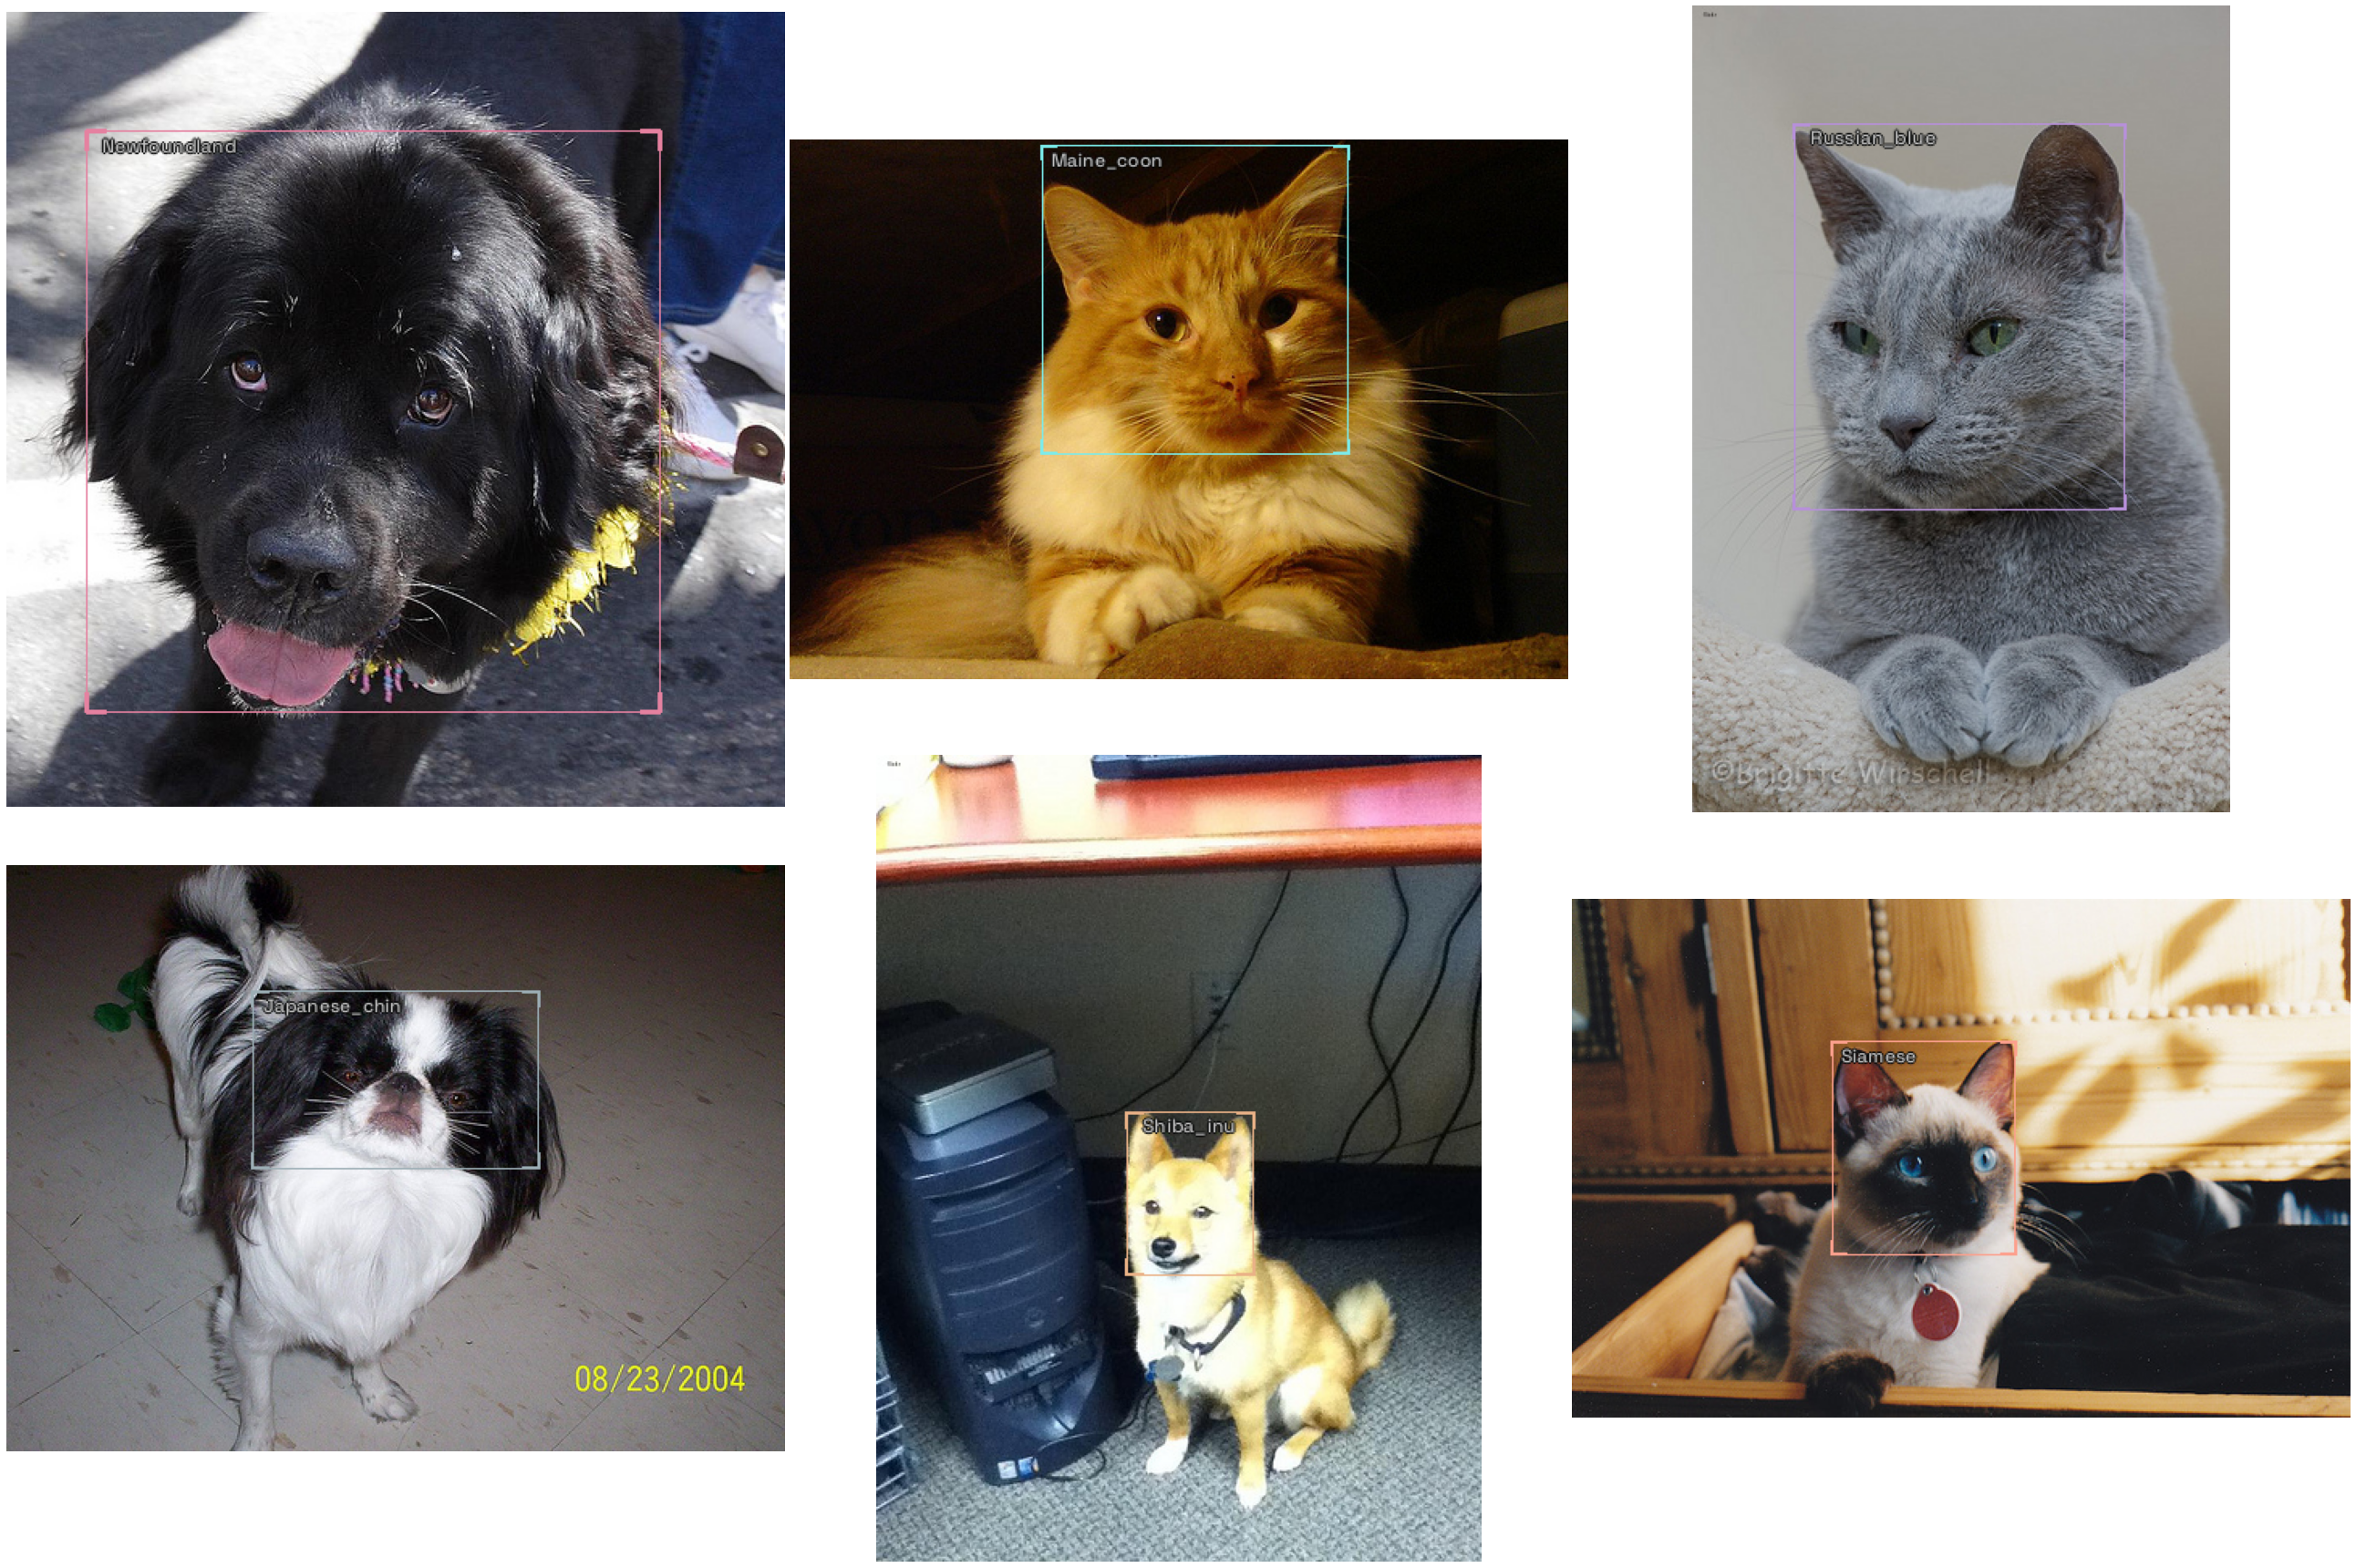

In [54]:
data_splitter = RandomSplitter([0.8, 0.2])

# PETS parser: provided out-of-the-box
#parser = icedata.pets.parser(data_dir=path, class_map=class_map)
##
parser = icedata.pets.parser(data_dir=path)## removed mask

train_records, valid_records = parser.parse(data_splitter)

show_records(train_records[:6], ncols=3, class_map=class_map, show=True)
## see how to make the bounding box more visible

In [55]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

# from above source
train_dl = faster_rcnn.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = faster_rcnn.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

In [56]:
model_type = models.torchvision.faster_rcnn

model = faster_rcnn.model(num_classes= len(class_map)) ## 
# https://github.com/spiyer99/aerial_object_detection/blob/master/icevision_geospatial.ipynb


SuggestedLRs(lr_min=0.0003019951749593019, lr_steep=2.0892961401841603e-05)

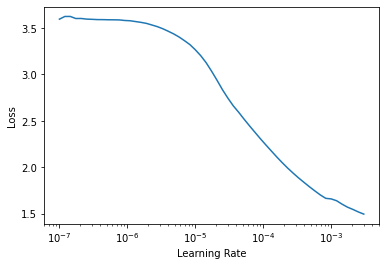

In [57]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

learn = faster_rcnn.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)
learn.lr_find()

In [59]:
learn.fine_tune(10, 0.005, freeze_epochs=1)
## better metric but high valid loss

## check about losses

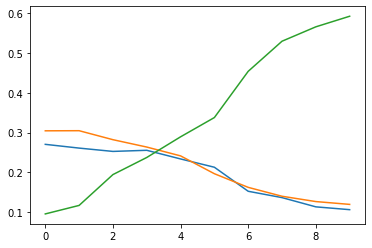

In [60]:
# n_epoch 10, lr 0.005
import matplotlib.pyplot as plt
plt.plot(L(learn.recorder.values).itemgot());
# blue train_loss, orange valid loss, green metric
# should stop at n_epoch=3-4
# x epoch
# y metric

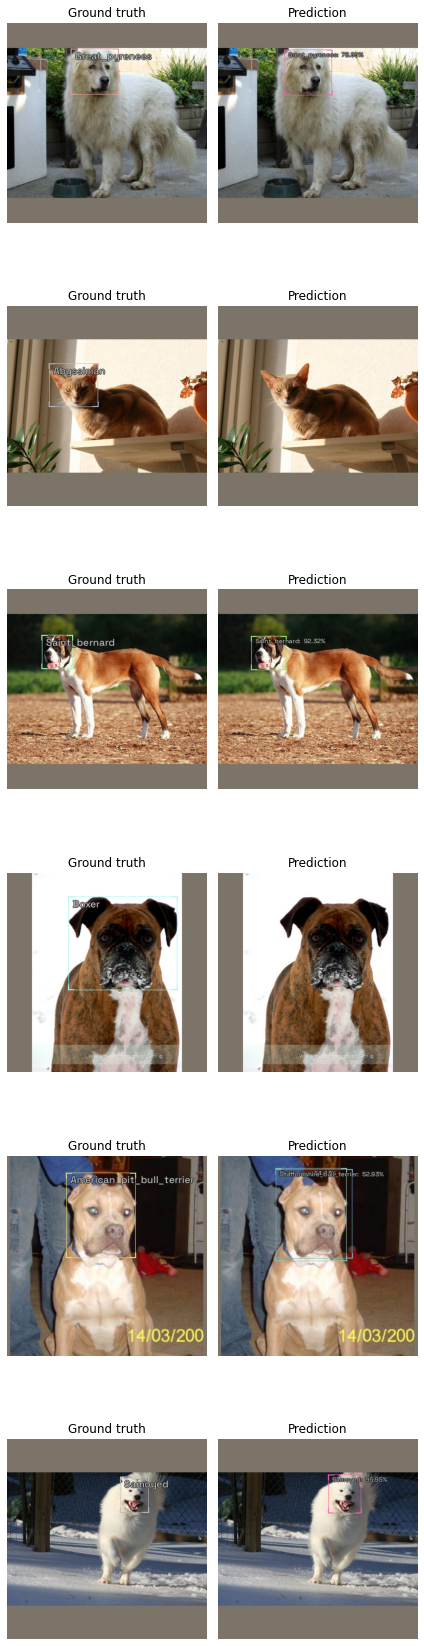

In [61]:
# 10 epochs
## connection to learn?
faster_rcnn.show_results(model, valid_ds)

In [62]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
query_string = 'cat'
cat_1 = downloader.download(query_string, limit = 1, 
                            output_dir = 'dataset',
                            adult_filter_off=True,
                            force_replace=False,
                            timeout=60,
                            verbose=True)
cat_1

[%] Downloading Images to /content/dataset/cat


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://i.redd.it/lln5boitd7c21.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.

Please show your support here
https://www.buymeacoffee.com/gurugaurav




  0%|          | 0/916875 [00:00<?, ?B/s]

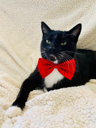

In [78]:
cat_1_url = ['https://i.redd.it/lln5boitd7c21.jpg']
dest = 'Desktop'
download_url(cat_1_url[0],dest)

from PIL import Image

image = Image.open(dest)
image.to_thumb(128)

In [79]:
img = np.array(image)

infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])

infer = Dataset.from_images([img], infer_tfms, class_map = class_map)

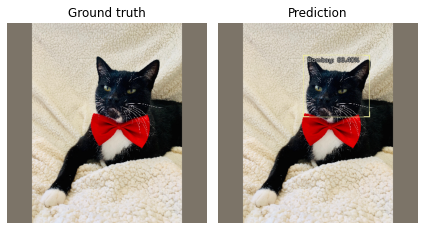

In [80]:
preds = model_type.predict(model, infer, keep_images=True)

show_preds(preds=preds)

In [ ]:
## choose one with rec label

In [68]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
query_string = 'Persian cat'
cat_1 = downloader.download(query_string, limit = 1, 
                            output_dir = 'dataset',
                            adult_filter_off=True,
                            force_replace=False,
                            timeout=60,
                            verbose=True)
cat_1

[%] Downloading Images to /content/dataset/Persian cat


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://pixfeeds.com/images/cats/1280-633113756-white-persian-cats.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.

Please show your support here
https://www.buymeacoffee.com/gurugaurav




  0%|          | 0/141900 [00:00<?, ?B/s]

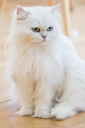

In [69]:
cat_1_url = ['https://pixfeeds.com/images/cats/1280-633113756-white-persian-cats.jpg']
dest = 'Desktop'
download_url(cat_1_url[0],dest)

from PIL import Image

image = Image.open(dest)
image.to_thumb(128)

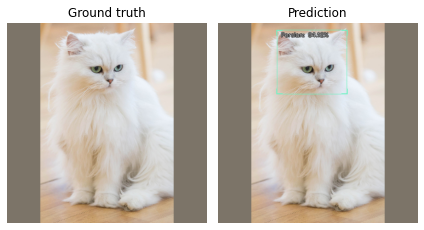

In [75]:
img = np.array(image)

infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])

infer = Dataset.from_images([img], infer_tfms, class_map=class_map )#

preds = model_type.predict(model, infer, keep_images=True)

show_preds(preds=preds)
# with bbox but no label

  0%|          | 0/152149505 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


SuggestedLRs(lr_min=3.981071640737355e-05, lr_steep=0.0002754228771664202)

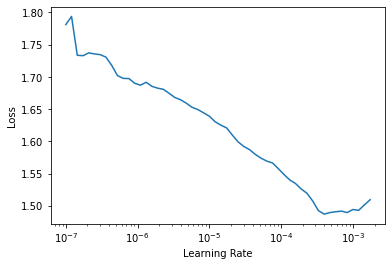

In [92]:
## trying another model to check train/ valid loss
model_type = models.mmdet.retinanet

backbone = model_type.backbones.resnet50_fpn_1x(pretrained=True)

model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map)) 

train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)

metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

learn.lr_find()

In [93]:
# using mmdet retinanet
learn.fine_tune(10, 0.0003, freeze_epochs=1)
# epoch 4 valid loss slightly higher than train loss, but continues to go down

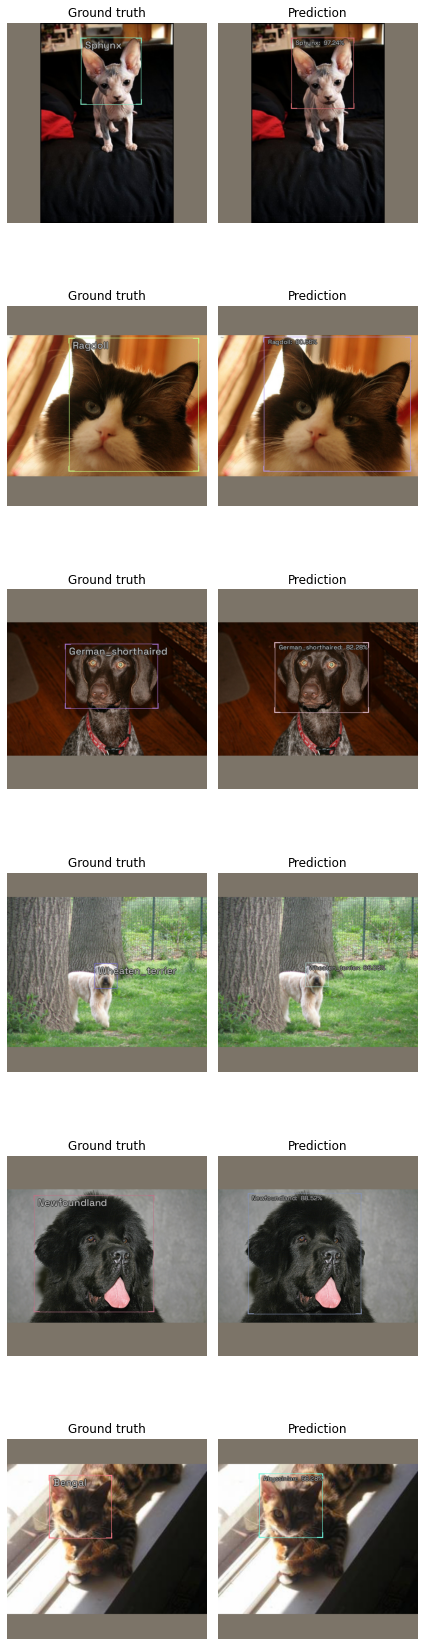

In [94]:
# using mmdet retinanet
model_type.show_results(model, valid_ds, detection_threshold=.5)


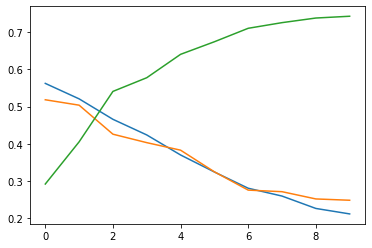

In [96]:
# n_epoch 10, lr 0.0003, mmdet, retinanet
import matplotlib.pyplot as plt
plt.plot(L(learn.recorder.values).itemgot());
# blue train_loss, orange valid loss, green metric
# should stop at n_epoch=3-4
# x epoch
# y metric

In [97]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
query_string = 'Persian cat'
cat_1 = downloader.download(query_string, limit = 1, 
                            output_dir = 'dataset',
                            adult_filter_off=True,
                            force_replace=False,
                            timeout=60,
                            verbose=True)
cat_1

[%] Downloading Images to /content/dataset/Persian cat


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://pixfeeds.com/images/cats/1280-633113756-white-persian-cats.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.

Please show your support here
https://www.buymeacoffee.com/gurugaurav




  0%|          | 0/141900 [00:00<?, ?B/s]

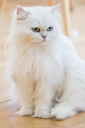

In [98]:
cat_1_url = ['https://pixfeeds.com/images/cats/1280-633113756-white-persian-cats.jpg']
dest = 'Desktop'
download_url(cat_1_url[0],dest)

from PIL import Image

image = Image.open(dest)
image.to_thumb(128)

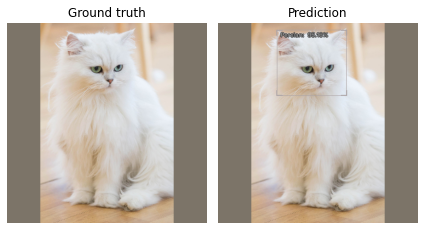

In [99]:
# using mmdet retinanet
img = np.array(image)

infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])

infer = Dataset.from_images([img], infer_tfms, class_map=class_map )#

preds = model_type.predict(model, infer, keep_images=True)

show_preds(preds=preds)

In [6]:
## skipped
learn.fine_tune(5, 0.005, freeze_epochs=1)

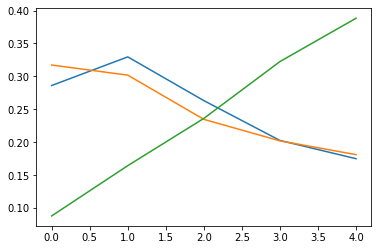

In [24]:
## skipped
import matplotlib.pyplot as plt
plt.plot(L(learn.recorder.values).itemgot());
# blue train_loss, orange valid loss, green metric
# should stop at n_epoch=3-4

In [6]:
learn_b = learn.fine_tune(4, 0.005, freeze_epochs=1)
learn_b

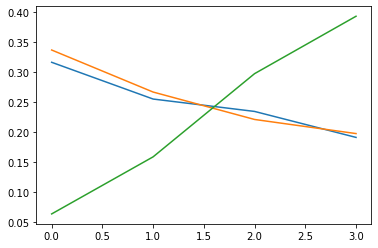

In [7]:
## run
import matplotlib.pyplot as plt
plt.plot(L(learn.recorder.values).itemgot());
# blue train_loss, orange valid loss, green metric
# should stop at n_epoch=3-4
# x epoch
# y metric

In [35]:
## cuda out of memory x2
#infer_dl = faster_rcnn.infer_dl(valid_ds, batch_size=8)
# samples, preds = faster_rcnn.predict(model=model, dataset = valid_ds)

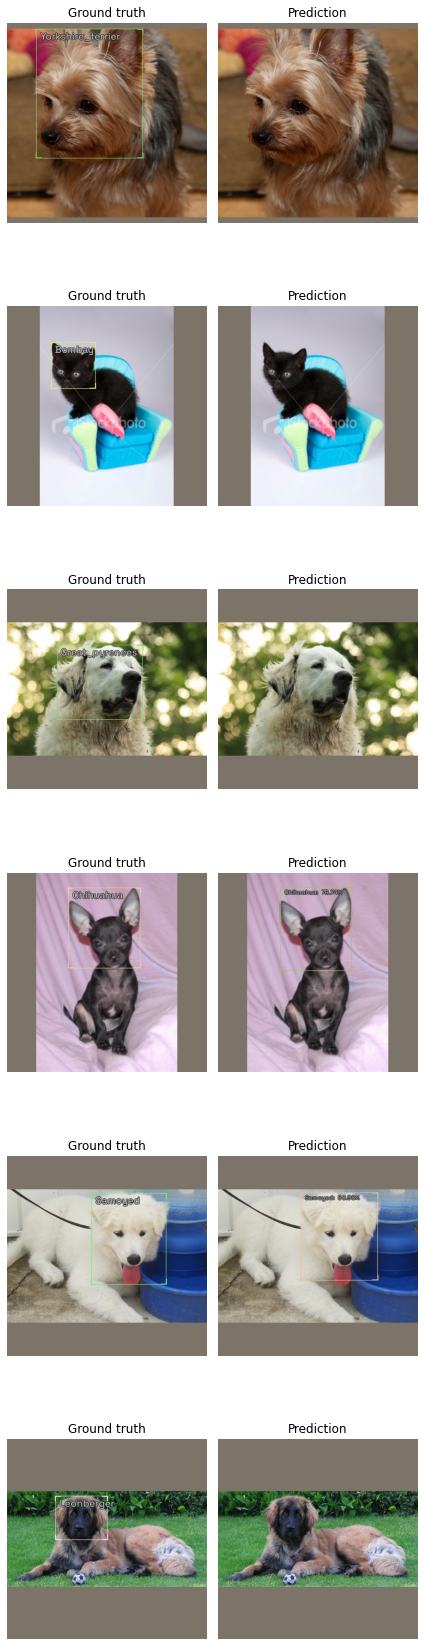

In [9]:
# https://github.com/spiyer99/aerial_object_detection/blob/master/icevision_geospatial.ipynb
# 4 epochs
faster_rcnn.show_results(model, valid_ds)
# still with empties

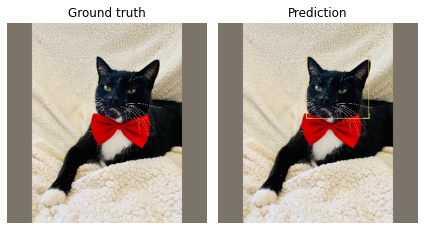

In [34]:
# when using weights from url
from icedata.utils import load_model_weights_from_url

WEIGHTS_URL = 'https://github.com/airctic/model_zoo/releases/download/m3/pets_faster_resnetfpn50.zip'
load_model_weights_from_url(model, WEIGHTS_URL, map_location=torch.device('cpu'))

preds = model_type.predict(model, infer, keep_images=True)

show_preds(preds=preds)
# now with bbox

In [32]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg'

import PIL, requests
def image_from_url(url):
    res = requests.get(url, stream=True)
    img = PIL.Image.open(res.raw)
    return np.array(img)

In [ ]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(